In [1]:
import networkx as nx
import osmnx as ox
import geopandas as gpd
import contextily as ctx 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Traveling Salesperson Problem
The canonical [Traveling Salesperson Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem) is stated as:
>  "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?"

This is generalizable to finding the shortest [Hamiltonian cycle](http://mathworld.wolfram.com/HamiltonianCycle.html) on a fully connected graph (i.e. all nodes can be reached from all other nodes).

This problem is [NP-hard](https://en.wikipedia.org/wiki/P_versus_NP_problem), meaning it is not possible for an algorithm to solve all instances of the problem quickly (i.e. in polynomial time). However, there are many approximate and heuristic approaches which can give reasonable solutions in shorter time.

In [2]:
place_name = 'New York City, NY, United States'
place_roads = ox.graph_from_place(place_name)


In [3]:
# save graph to file for reuse
ox.io.save_graphml(place_roads, 'nyc_osmnx.graphml')

In [4]:
# loading graph from a file
place_roads = ox.io.load_graphml('nyc_osmnx.graphml')

In [5]:
place_roads_nodes, place_roads_edges = ox.graph_to_gdfs(place_roads)

<Axes: >

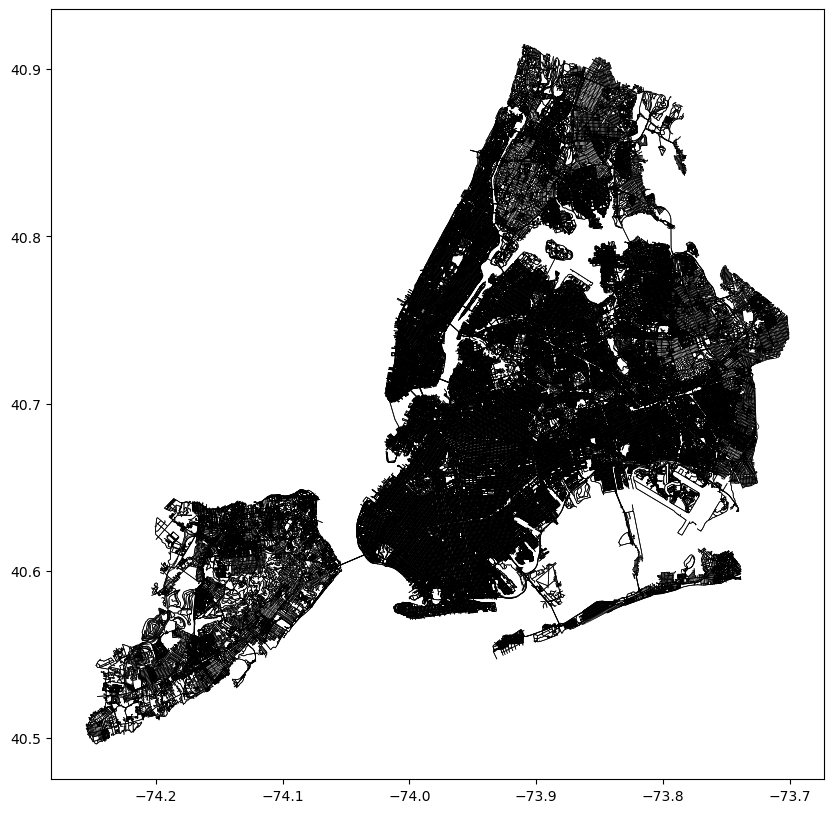

In [6]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,1,1)
place_roads_edges.plot(ax=ax, color=[0, 0, 0], linewidth=0.5)

Let's say you wanted to do a ice cream crawl: you want to visit every ice cream shop in a city. What is the shortest route that you would take that takes you to every ice cream shop in a city and brings you back to your starting point?

In [7]:
'''
place_ice_cream = ox.geometries.geometries_from_place(place_name, tags={"amenity":"ice_cream"})

#some of the ice cream shops return polygons instead of points, so we need to take their centroids
place_ice_cream = place_ice_cream.to_crs("epsg:3857") #projecting to Web-Mercator for more accurate centroids
place_ice_cream["geometry"] = place_ice_cream["geometry"].centroid
place_ice_cream = place_ice_cream.to_crs("epsg:4326") #projecting back to lat/long

place_ice_cream

'''
# Get ice cream shop locations
place_ice_cream = ox.features.features_from_place(place_name, tags={"amenity": "ice_cream"})

# Projecting to Web-Mercator for more accurate centroids
place_ice_cream = place_ice_cream.to_crs("epsg:3857")

# Some of the ice cream shops return polygons instead of points, so we need to take their centroids
place_ice_cream["geometry"] = place_ice_cream.geometry.centroid

# Projecting back to lat/long
place_ice_cream = place_ice_cream.to_crs("epsg:4326")

# Display the result
print(place_ice_cream)

                        addr:city addr:housenumber addr:postcode addr:state  \
element_type osmid                                                            
node         419360637   New York               95         10003         NY   
             419364720   Brooklyn               81         11201         NY   
             475485737   Brooklyn                1         11201         NY   
             617342597        NaN              341         11211        NaN   
             1109836197  New York               93         10009         NY   
...                           ...              ...           ...        ...   
way          280470545        NaN              NaN           NaN        NaN   
             405892188   Brooklyn             1224         11224         NY   
             904169911        NaN              NaN           NaN        NaN   
             904206111        NaN              NaN           NaN        NaN   
             904206135        NaN              NaN  

In [8]:
place_ice_cream

addr:city addr:housenumber addr:postcode addr:state  \
element_type osmid                                                            
node         419360637   New York               95         10003         NY   
             419364720   Brooklyn               81         11201         NY   
             475485737   Brooklyn                1         11201         NY   
             617342597        NaN              341         11211        NaN   
             1109836197  New York               93         10009         NY   
...                           ...              ...           ...        ...   
way          280470545        NaN              NaN           NaN        NaN   
             405892188   Brooklyn             1224         11224         NY   
             904169911        NaN              NaN           NaN        NaN   
             904206111        NaN              NaN           NaN        NaN   
             904206135        NaN              NaN           NaN        NaN   

                              addr:street    amenity  \
element_type osmid                                     
node         419360637   East 10th Street  ice_cream   
             419364720      Bergen Street  ice_cream   
             475485737       Water Street  ice_cream   
             617342597      Graham Avenue  ice_cream   
             1109836197   East 7th Street  ice_cream   
...                                   ...        ...   
way          280470545                NaN  ice_cream   
             405892188        Surf Avenue  ice_cream   
             904169911                NaN  ice_cream   
             904206111                NaN  ice_cream   
             904206135                NaN  ice_cream   

                                             name  \
element_type osmid                                  
node         419360637          Sundaes and Cones   
             419364720                Van Leeuwen   
             475485737      Van Leeuwen Ice Cream   
             617342597              Uncle Louie G   
             1109836197                  Baonanas   
...                                           ...   
way          280470545   Lemon Ice King of Corona   
             405892188         Lunatics Ice Cream   
             904169911                  Red Mango   
             904206111         Sweet Ice Creamery   
             904206135                     Carvel   

                                                             opening_hours  \
element_type osmid                                                           
node         419360637                                   Mo-Su 12:00-22:00   
             419364720                                   Mo-Su 11:00-24:00   
             475485737                                         11:00-23:30   
             617342597                                                 NaN   
             1109836197  Mo off; Tu off; We off; Th,Fr 16:00-00:00; Sa ...   
...                                                                    ...   
way          280470545                                                 NaN   
             405892188                                                 NaN   
             904169911                                                 NaN   
             904206111                                                 NaN   
             904206135                                                 NaN   

                        outdoor_seating            phone  ... payment:paypal  \
element_type osmid                                        ...                  
node         419360637            bench  +1-212-979-9398  ...            NaN   
             419364720              NaN  +1-347-763-2979  ...            NaN   
             475485737              yes              NaN  ...            NaN   
             617342597              NaN  +1-718-354-5777  ...            NaN   
             1109836197             NaN              NaN  ...            NaN   
..

In [9]:
ice_cream_nodes = ox.distance.nearest_nodes(place_roads, place_ice_cream.geometry.x, place_ice_cream.geometry.y)
ice_cream_nodes

[8309479610,
 10745141695,
 999184502,
 9795356081,
 8309479529,
 7465391419,
 8262309032,
 8314977757,
 8236746391,
 7779545035,
 6406731704,
 11848946722,
 11657455862,
 11655743678,
 10042478746,
 10061553268,
 8309479210,
 10779679897,
 9883324376,
 11728696954,
 8309479243,
 8916499429,
 11340598567,
 5415926010,
 7571891035,
 10770328374,
 7465125494,
 10642847921,
 4216045841,
 9897530715,
 9895223982,
 8775287191,
 9973544297,
 10799630035,
 11629022371,
 11808883695,
 11384348020,
 11382841923,
 10655305018,
 6638433920,
 3891969471,
 9811007532,
 4300912707,
 8231896467,
 6369613044,
 8262308486,
 9850720011,
 4964127740,
 9836260689,
 10165972532,
 8288270355,
 10168088481,
 9235539544,
 7137586326,
 5115907032,
 11655721340,
 6597498400,
 10171187069,
 11595000946,
 10743722636,
 6452901805,
 9242368788,
 8288329067,
 5396215013,
 5021215643,
 42876552,
 5487925826,
 10170640086,
 8250715772,
 8309479715,
 7570756477,
 10168088485,
 7834024295,
 8576198811,
 10036563049,
 9

## Exercise
Plot the locations of the ice cream shops on the map of the roads

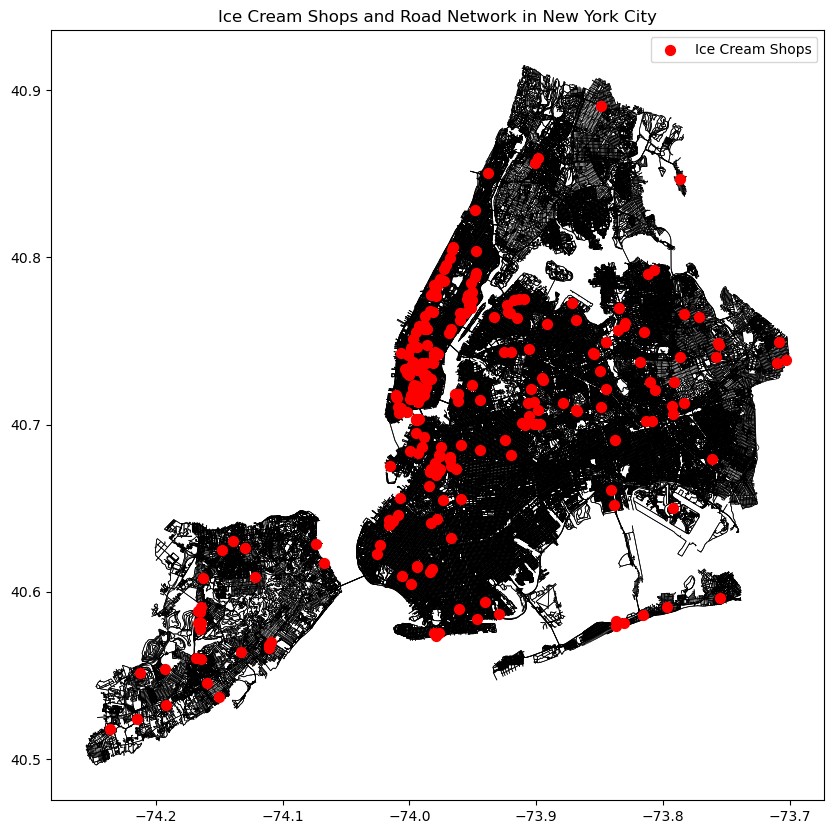

In [10]:
# Plot the road network first
fig, ax = plt.subplots(figsize=[10, 10])
place_roads_edges.plot(ax=ax, color=[0, 0, 0], linewidth=0.5)

# Projecting to Web-Mercator for more accurate centroids
place_ice_cream = place_ice_cream.to_crs("epsg:3857")

# Some of the ice cream shops return polygons instead of points, so we need to take their centroids
place_ice_cream["geometry"] = place_ice_cream.geometry.centroid

# Projecting back to lat/long
place_ice_cream = place_ice_cream.to_crs("epsg:4326")

# Find the nearest nodes in the road network for the ice cream shop locations
ice_cream_nodes = ox.distance.nearest_nodes(place_roads, place_ice_cream.geometry.x, place_ice_cream.geometry.y)

# Plot the ice cream shop locations on top of the road network
place_ice_cream.plot(ax=ax, color='red', markersize=50, label='Ice Cream Shops', zorder=5)

# Add legend and show the plot
plt.legend()
plt.title('Ice Cream Shops and Road Network in New York City')
plt.show()

## Compute shortest path matrix

In [11]:
shortest_path_matrix = np.zeros([len(ice_cream_nodes),len(ice_cream_nodes)])
for idx_i, orig in enumerate(ice_cream_nodes):
    shortest_paths = nx.single_source_dijkstra_path_length(place_roads, orig, weight='length')
    for idx_j, dest in enumerate(ice_cream_nodes):
        shortest_path_matrix[idx_i, idx_j] = shortest_paths[dest]
shortest_path_matrix

array([[    0.   ,  5305.529,  4694.404, ..., 29249.383, 29325.838,
        29247.638],
       [ 5303.54 ,     0.   ,  2183.482, ..., 23952.39 , 24028.845,
        23950.645],
       [ 4699.241,  2183.828,     0.   , ..., 25895.018, 25971.473,
        25893.273],
       ...,
       [29378.18 , 24081.29 , 26048.579, ...,     0.   ,   221.193,
          636.559],
       [29402.387, 24105.497, 26072.786, ...,   221.193,     0.   ,
          714.346],
       [29353.81 , 24056.92 , 26024.209, ...,   633.796,   725.7  ,
            0.   ]])

In [16]:
'''
ice_cream_graph = nx.from_numpy_matrix(shortest_path_matrix, create_using=nx.MultiDiGraph)
'''
ice_cream_graph = nx.from_numpy_array(shortest_path_matrix, create_using=nx.MultiDiGraph)

In [17]:
# new graph indexes from 0
ice_cream_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [18]:
# rename node labels using original labels
ice_cream_graph = nx.relabel_nodes(ice_cream_graph,{k:v for k, v in zip(ice_cream_graph.nodes, ice_cream_nodes)})
ice_cream_graph.nodes

NodeView((8309479610, 10745141695, 999184502, 9795356081, 8309479529, 7465391419, 8262309032, 8314977757, 8236746391, 7779545035, 6406731704, 11848946722, 11657455862, 11655743678, 10042478746, 10061553268, 8309479210, 10779679897, 9883324376, 11728696954, 8309479243, 8916499429, 11340598567, 5415926010, 7571891035, 10770328374, 7465125494, 10642847921, 4216045841, 9897530715, 9895223982, 8775287191, 9973544297, 10799630035, 11629022371, 11808883695, 11384348020, 11382841923, 10655305018, 6638433920, 3891969471, 9811007532, 4300912707, 8231896467, 6369613044, 8262308486, 9850720011, 4964127740, 9836260689, 10165972532, 8288270355, 10168088481, 9235539544, 7137586326, 5115907032, 11655721340, 6597498400, 10171187069, 11595000946, 10743722636, 6452901805, 9242368788, 8288329067, 5396215013, 5021215643, 42876552, 5487925826, 10170640086, 8250715772, 8309479715, 7570756477, 10168088485, 7834024295, 8576198811, 10036563049, 9897810833, 11655743712, 10919411354, 8309479718, 5388184840, 43200

## Exercise
Implement each of the following methods to see how good of a TSP path you can obtain.

## Method 1: Random
Let's start by setting a baseline; how well can we do by starting at a random node and choosing a random node out of the ones remaining each time? 

After you find the path, draw it on the map and print its length. (You don't need to draw the actual roads taken, just draw lines between the nodes.)

Path node: 8429015950, Ice cream nodes: [8309479610, 10745141695, 999184502, 9795356081, 8309479529, 7465391419, 8262309032, 8314977757, 8236746391, 7779545035, 6406731704, 11848946722, 11657455862, 11655743678, 10042478746, 10061553268, 8309479210, 10779679897, 9883324376, 11728696954, 8309479243, 8916499429, 11340598567, 5415926010, 7571891035, 10770328374, 7465125494, 10642847921, 4216045841, 9897530715, 9895223982, 8775287191, 9973544297, 10799630035, 11629022371, 11808883695, 11384348020, 11382841923, 10655305018, 6638433920, 3891969471, 9811007532, 4300912707, 8231896467, 6369613044, 8262308486, 9850720011, 4964127740, 9836260689, 10165972532, 8288270355, 10168088481, 9235539544, 7137586326, 5115907032, 11655721340, 6597498400, 10171187069, 11595000946, 10743722636, 6452901805, 9242368788, 8288329067, 5396215013, 5021215643, 42876552, 5487925826, 10170640086, 8250715772, 8309479715, 7570756477, 10168088485, 7834024295, 8576198811, 10036563049, 9897810833, 11655743712, 10919411354

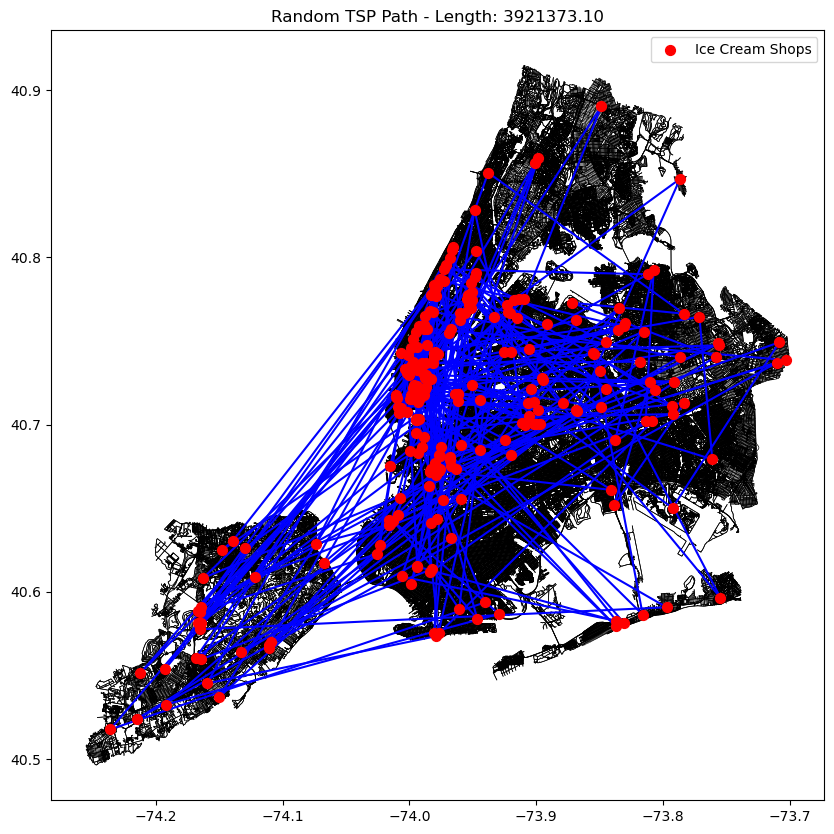

Random TSP Path Length: 3921373.10


In [33]:

# Ensure ice_cream_nodes is a list
ice_cream_nodes_list = list(ice_cream_nodes)

# Start at a random node
start_node = random.choice(list(ice_cream_graph.nodes))
nodes_to_visit = list(ice_cream_graph.nodes)
nodes_to_visit.remove(start_node)

# Create a random path
path = [start_node]
while nodes_to_visit:
    next_node = random.choice(nodes_to_visit)
    nodes_to_visit.remove(next_node)
    path.append(next_node)

# Return to the start node to complete the cycle
path.append(start_node)

# Calculate the path length
path_length = sum(nx.shortest_path_length(ice_cream_graph, path[i], path[i+1], weight='weight') for i in range(len(path)-1))

# Plot the road network
fig, ax = plt.subplots(figsize=[10, 10])
place_roads_edges.plot(ax=ax, color=[0, 0, 0], linewidth=0.5)

# Plot the ice cream shop locations on top of the road network
place_ice_cream.plot(ax=ax, color='red', markersize=50, label='Ice Cream Shops', zorder=5)

# Draw the path
for i in range(len(path)-1):
    #print(f'Path node: {path[i]}, Ice cream nodes: {ice_cream_nodes_list}')  # Debug print
    p1_indices = np.flatnonzero(np.array(ice_cream_nodes_list) == path[i])
    p2_indices = np.flatnonzero(np.array(ice_cream_nodes_list) == path[i+1])
    
    if len(p1_indices) == 0 or len(p2_indices) == 0:
        print(f'Error: Could not find path nodes in ice_cream_nodes. Path node: {path[i]}, Next node: {path[i+1]}')
        continue

    p1_index = p1_indices[0]
    p2_index = p2_indices[0]
    p1 = place_ice_cream.iloc[p1_index].geometry
    p2 = place_ice_cream.iloc[p2_index].geometry
    ax.plot([p1.x, p2.x], [p1.y, p2.y], 'blue', zorder=4)

plt.legend()
plt.title(f'Random TSP Path - Length: {path_length:.2f}')
plt.show()

print(f'Random TSP Path Length: {path_length:.2f}')


## Method 2: Greedy
Now, let's try to choose nodes more intelligently: start at a random node again, but instead of choosing a random node each time, always choose the node closest to the current node each time.

Again, draw the path on the map and print its length.

Path node: 11819488431, Ice cream nodes: [8309479610, 10745141695, 999184502, 9795356081, 8309479529, 7465391419, 8262309032, 8314977757, 8236746391, 7779545035, 6406731704, 11848946722, 11657455862, 11655743678, 10042478746, 10061553268, 8309479210, 10779679897, 9883324376, 11728696954, 8309479243, 8916499429, 11340598567, 5415926010, 7571891035, 10770328374, 7465125494, 10642847921, 4216045841, 9897530715, 9895223982, 8775287191, 9973544297, 10799630035, 11629022371, 11808883695, 11384348020, 11382841923, 10655305018, 6638433920, 3891969471, 9811007532, 4300912707, 8231896467, 6369613044, 8262308486, 9850720011, 4964127740, 9836260689, 10165972532, 8288270355, 10168088481, 9235539544, 7137586326, 5115907032, 11655721340, 6597498400, 10171187069, 11595000946, 10743722636, 6452901805, 9242368788, 8288329067, 5396215013, 5021215643, 42876552, 5487925826, 10170640086, 8250715772, 8309479715, 7570756477, 10168088485, 7834024295, 8576198811, 10036563049, 9897810833, 11655743712, 1091941135

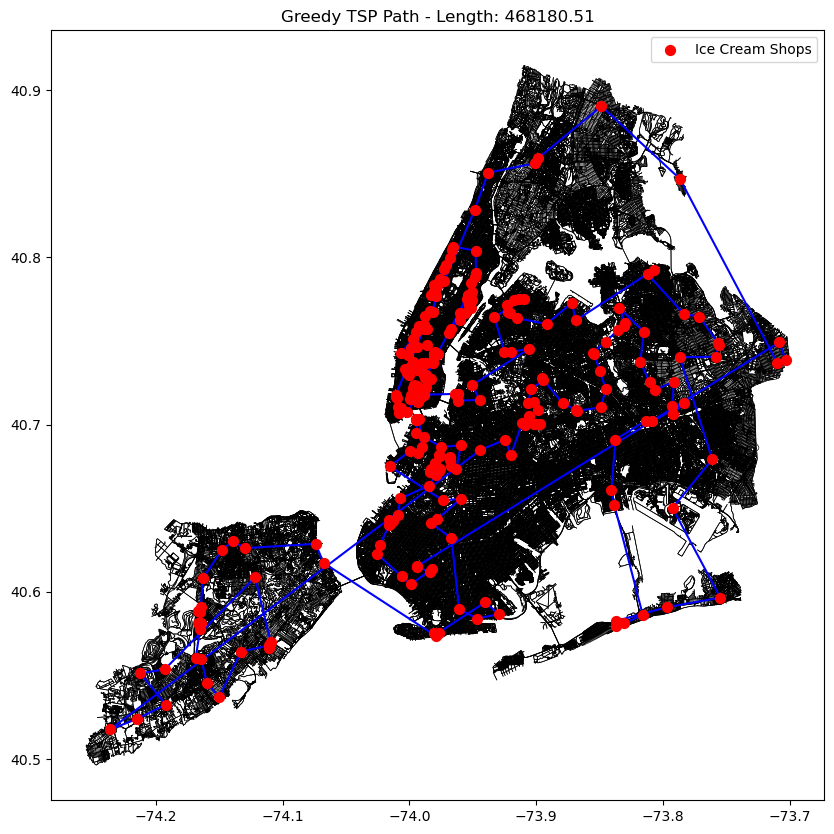

Greedy TSP Path Length: 468180.51


In [32]:

# Ensure ice_cream_nodes is a list
ice_cream_nodes_list = list(ice_cream_nodes)

# Start at a random node
start_node = random.choice(list(ice_cream_graph.nodes))
nodes_to_visit = list(ice_cream_graph.nodes)
nodes_to_visit.remove(start_node)

# Create a greedy path using the precomputed shortest path matrix
path = [start_node]
while nodes_to_visit:
    current_node = path[-1]
    next_node = min(nodes_to_visit, key=lambda node: shortest_path_matrix[ice_cream_nodes_list.index(current_node)][ice_cream_nodes_list.index(node)])
    nodes_to_visit.remove(next_node)
    path.append(next_node)

# Return to the start node to complete the cycle
path.append(start_node)

# Calculate the path length using the precomputed shortest path matrix
path_length = sum(shortest_path_matrix[ice_cream_nodes_list.index(path[i])][ice_cream_nodes_list.index(path[i+1])] for i in range(len(path)-1))

# Plot the road network
fig, ax = plt.subplots(figsize=[10, 10])
place_roads_edges.plot(ax=ax, color=[0, 0, 0], linewidth=0.5)

# Plot the ice cream shop locations on top of the road network
place_ice_cream.plot(ax=ax, color='red', markersize=50, label='Ice Cream Shops', zorder=5)

# Draw the path
for i in range(len(path)-1):
    print(f'Path node: {path[i]}, Ice cream nodes: {ice_cream_nodes_list}')  # Debug print
    p1_indices = np.flatnonzero(np.array(ice_cream_nodes_list) == path[i])
    p2_indices = np.flatnonzero(np.array(ice_cream_nodes_list) == path[i+1])
    
    if len(p1_indices) == 0 or len(p2_indices) == 0:
        print(f'Error: Could not find path nodes in ice_cream_nodes. Path node: {path[i]}, Next node: {path[i+1]}')
        continue

    p1_index = p1_indices[0]
    p2_index = p2_indices[0]
    p1 = place_ice_cream.iloc[p1_index].geometry
    p2 = place_ice_cream.iloc[p2_index].geometry
    ax.plot([p1.x, p2.x], [p1.y, p2.y], 'blue', zorder=4)

plt.legend()
plt.title(f'Greedy TSP Path - Length: {path_length:.2f}')
plt.show()

print(f'Greedy TSP Path Length: {path_length:.2f}')


## Method 3: Random with 2-opt swapping

You may have noticed that both paths contain a lot of edges that cross each other, which is nonideal. However, there exists an algorithm to remove all the paths that cross each other from a Hamiltonian cycle: the [2-opt](https://en.wikipedia.org/wiki/2-opt) algorithm. We can use that to our advantage here.

Start by generating a random Hamiltonian cycle like in method 1, but this time, use the 2-opt algorithm to optimize it further. Again, draw it on the map and print its length.

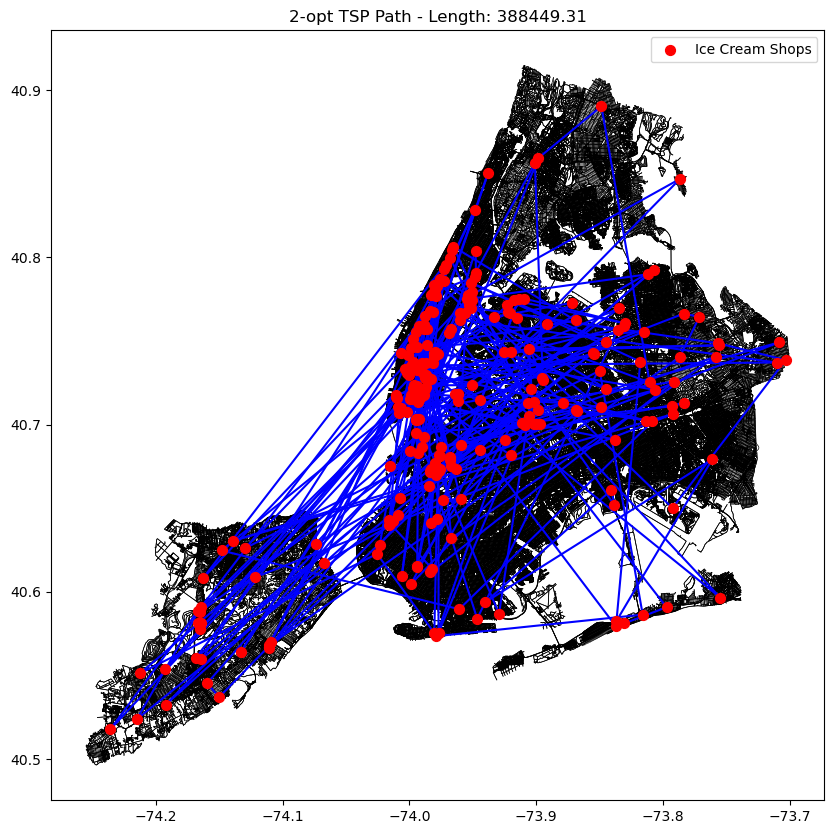

2-opt TSP Path Length: 388449.31


In [41]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def two_opt_swap(route, i, k):
    return route[:i] + route[i:k+1][::-1] + route[k+1:]

def calculate_path_length(graph, path, precomputed_lengths):
    return sum(precomputed_lengths[path[i]][path[i+1]] for i in range(len(path)-1))

def delta_path_length_change(precomputed_lengths, path, i, k):
    if i > 0:
        A, B = path[i-1], path[i]
    else:
        A, B = None, None
    C, D = path[k], path[k+1]

    if A is not None:
        old_length = precomputed_lengths[A][B] + precomputed_lengths[C][D]
        new_length = precomputed_lengths[A][C] + precomputed_lengths[B][D]
    else:
        old_length = precomputed_lengths[C][D]
        new_length = precomputed_lengths[C][B] + precomputed_lengths[D][A]

    return new_length - old_length

# Start with a random path
start_node = random.choice(list(ice_cream_graph.nodes))
nodes_to_visit = list(ice_cream_graph.nodes)
nodes_to_visit.remove(start_node)
random_path = [start_node] + random.sample(nodes_to_visit, len(nodes_to_visit)) + [start_node]

# Precompute all shortest paths
precomputed_lengths = {}
for u in ice_cream_graph.nodes:
    precomputed_lengths[u] = nx.single_source_dijkstra_path_length(ice_cream_graph, u, weight='weight')

# Perform 2-opt swapping to optimize the path
best_path = random_path
best_path_length = calculate_path_length(ice_cream_graph, best_path, precomputed_lengths)
improved = True
while improved:
    improved = False
    for i in range(1, len(best_path) - 2):
        for k in range(i+1, len(best_path) - 1):
            length_change = delta_path_length_change(precomputed_lengths, best_path, i, k)
            if length_change < 0:
                best_path = two_opt_swap(best_path, i, k)
                best_path_length += length_change
                improved = True

# Plot the road network
fig, ax = plt.subplots(figsize=[10, 10])
place_roads_edges.plot(ax=ax, color=[0, 0, 0], linewidth=0.5)

# Plot the ice cream shop locations on top of the road network
place_ice_cream.plot(ax=ax, color='red', markersize=50, label='Ice Cream Shops', zorder=5)

# Draw the best path
for i in range(len(best_path)-1):
    p1_indices = np.flatnonzero(np.array(ice_cream_nodes) == best_path[i])
    p2_indices = np.flatnonzero(np.array(ice_cream_nodes) == best_path[i+1])
    
    if len(p1_indices) == 0 or len(p2_indices) == 0:
        print(f'Error: Could not find path nodes in ice_cream_nodes. Path node: {best_path[i]}, Next node: {best_path[i+1]}')
        continue

    p1_index = p1_indices[0]
    p2_index = p2_indices[0]
    p1 = place_ice_cream.iloc[p1_index].geometry
    p2 = place_ice_cream.iloc[p2_index].geometry
    ax.plot([p1.x, p2.x], [p1.y, p2.y], 'blue', zorder=4)

plt.legend()
plt.title(f'2-opt TSP Path - Length: {best_path_length:.2f}')
plt.show()

print(f'2-opt TSP Path Length: {best_path_length:.2f}')


## Method 4: Open-ended

Although the 2-opt swaps reduce the length of the Hamiltonian cycle by quite a lot, they almost never provide the optimal solution. See if you can use another method to produce a Hamiltonian cycle shorter than the one you got with method 3. Some options to explore include:

- [3-opt](https://en.wikipedia.org/wiki/3-opt)
- [Multi-fragment algorithm](https://en.wikipedia.org/wiki/Multi-fragment_algorithm) with 2- or 3-opt swapping
- [Simulated annealing](https://en.wikipedia.org/wiki/Simulated_annealing)

The [TSP Wikipedia page](https://en.wikipedia.org/wiki/Travelling_salesman_problem) has many other algorithms that could be of use to you as well.


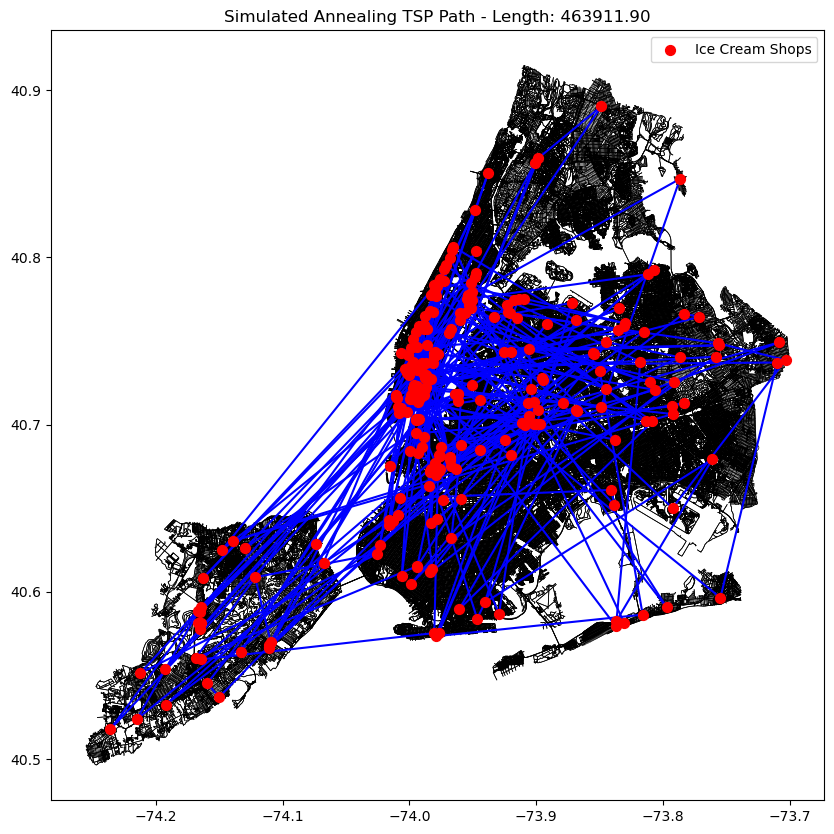

Simulated Annealing TSP Path Length: 463911.90


In [39]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to perform 2-opt swap
def two_opt_swap(route, i, k):
    return route[:i] + route[i:k+1][::-1] + route[k+1:]

# Function to calculate the path length
def calculate_path_length(graph, path):
    return sum(precomputed_lengths[path[i]][path[i+1]] for i in range(len(path)-1))

# Greedy algorithm to get an initial solution
def greedy_tsp(graph, nodes):
    start_node = random.choice(nodes)
    nodes_to_visit = nodes[:]
    nodes_to_visit.remove(start_node)
    path = [start_node]
    while nodes_to_visit:
        current_node = path[-1]
        next_node = min(nodes_to_visit, key=lambda node: precomputed_lengths[current_node][node])
        nodes_to_visit.remove(next_node)
        path.append(next_node)
    path.append(start_node)
    return path

# Simulated annealing algorithm
def simulated_annealing(path, graph, initial_temp, alpha, stopping_temp, max_iterations=1000):
    def path_length(path):
        return sum(precomputed_lengths[path[i]][path[i+1]] for i in range(len(path)-1))

    def get_neighbour(path):
        i, k = sorted(random.sample(range(1, len(path)-1), 2))
        return two_opt_swap(path, i, k)

    current_temp = initial_temp
    current_path = path
    best_path = path
    best_path_length = path_length(best_path)
    
    iteration = 0
    while current_temp > stopping_temp and iteration < max_iterations:
        candidate_path = get_neighbour(current_path)
        current_path_length = path_length(current_path)
        candidate_path_length = path_length(candidate_path)
        if candidate_path_length < current_path_length or np.random.rand() < np.exp((current_path_length - candidate_path_length) / current_temp):
            current_path = candidate_path
            if candidate_path_length < best_path_length:
                best_path = candidate_path
                best_path_length = candidate_path_length
        current_temp *= alpha
        iteration += 1
    return best_path, best_path_length

# Precompute all shortest paths
precomputed_lengths = {}
for u in ice_cream_graph.nodes:
    precomputed_lengths[u] = nx.single_source_dijkstra_path_length(ice_cream_graph, u, weight='weight')

# Get an initial solution using the greedy algorithm
ice_cream_nodes = list(ice_cream_graph.nodes)
initial_path = greedy_tsp(ice_cream_graph, ice_cream_nodes)

# Perform simulated annealing to optimize the path
optimized_path, optimized_path_length = simulated_annealing(initial_path, ice_cream_graph, initial_temp=10000, alpha=0.999, stopping_temp=1)

# Plot the road network
fig, ax = plt.subplots(figsize=[10, 10])
place_roads_edges.plot(ax=ax, color=[0, 0, 0], linewidth=0.5)

# Plot the ice cream shop locations on top of the road network
place_ice_cream.plot(ax=ax, color='red', markersize=50, label='Ice Cream Shops', zorder=5)

# Draw the optimized path
for i in range(len(optimized_path)-1):
    p1_indices = np.flatnonzero(np.array(ice_cream_nodes) == optimized_path[i])
    p2_indices = np.flatnonzero(np.array(ice_cream_nodes) == optimized_path[i+1])
    
    if len(p1_indices) == 0 or len(p2_indices) == 0:
        print(f'Error: Could not find path nodes in ice_cream_nodes. Path node: {optimized_path[i]}, Next node: {optimized_path[i+1]}')
        continue

    p1_index = p1_indices[0]
    p2_index = p2_indices[0]
    p1 = place_ice_cream.iloc[p1_index].geometry
    p2 = place_ice_cream.iloc[p2_index].geometry
    ax.plot([p1.x, p2.x], [p1.y, p2.y], 'blue', zorder=4)

plt.legend()
plt.title(f'Simulated Annealing TSP Path - Length: {optimized_path_length:.2f}')
plt.show()

print(f'Simulated Annealing TSP Path Length: {optimized_path_length:.2f}')
